#### 利用SVM，sklearn对iris数据集进行分类

## handle the data without the pd.datafram manupulation 


### Dataset: using the one of most popular classification dataset which is Iris dataset. Iris dataset is having 4 features of iris flower and one target class. The flower species type is the target class which has 3 types.

### The idea of implementing SVM classifier in Python is to use the iris features to train an svm classifier and use the trained svm model to predict the Iris species type.

## 1， Importing Iris dataset from Scikit-Learn and understand Iris dataset

In [1]:
# Required Packages 
from sklearn import datasets
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline

In [2]:
# import iris data to model Svm classifier
iris = datasets.load_iris()

In [3]:
# Using the DESCR key over the iris_dataset to describ the dataset
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [4]:
# To get the iris features and the target classes
X = iris.data
y = iris.target
#check the data
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
# check the X:
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 2， Visualizing the Iris dataset

#### 2.1 Visualizing the relationship between sepal and target classes

In [6]:
X = iris.data[:,:2]
y= iris.target
pd.DataFrame(X)

,0,1
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [7]:
X[y==0,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [8]:
X[y==0,1]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

In [9]:
pd.DataFrame(X)

,0,1
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


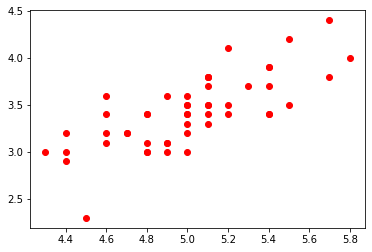

In [10]:
plt.scatter(X[y==0,0],X[y==0,1],color = 'r',marker='o')

Text(0, 0.5, 'sepal width')

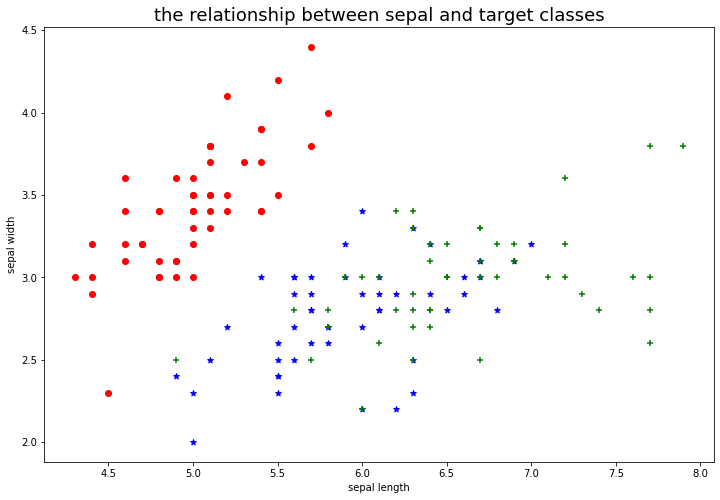

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(X[y==0,0],X[y==0,1],color = 'r',marker='o')
plt.scatter(X[y==1,0],X[y==1,1],color = 'b',marker='*')
plt.scatter(X[y==2,0],X[y==2,1],color = 'g',marker='+')
plt.title('the relationship between sepal and target classes',fontsize = 18)
plt.xlabel('sepal length')
plt.ylabel('sepal width')

#### 2.2 Visualizing the relationship between Petal and target classes

In [12]:
X = iris.data[:,2:]
y= iris.target
pd.DataFrame(X)

,0,1
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Text(0, 0.5, 'Petal width')

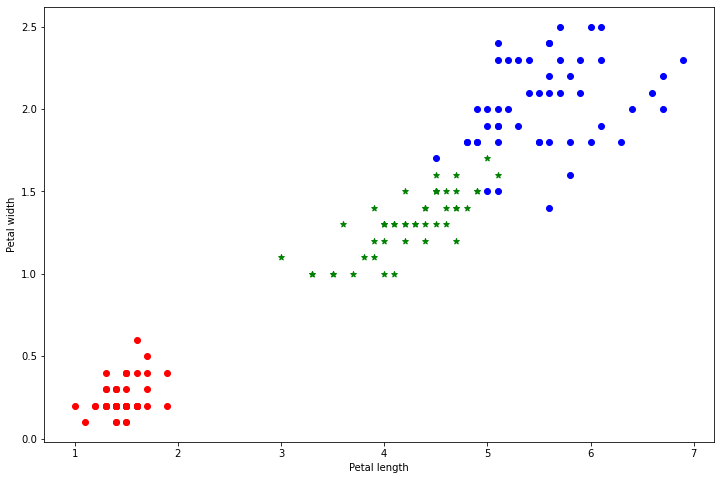

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(X[y==0,0],X[y==0,1],color='r',marker='o')
plt.scatter(X[y==1,0],X[y==1,1],color='g',marker='*')
plt.scatter(X[y==2,0],X[y==2,1],color='b',marker='o')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

#### 3. Modeling Different Kernel SVM classifier using 
## Iris Sepal features
with kernels of linear, RBF, and polynomial with degree=3

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data[:,:2], iris.target,test_size=0.3,random_state=0)

lin_svc = svm.SVC(kernel='linear').fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf').fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3).fit(X_train, y_train)

#### 4. Visualizing the modeled svm classifiers with 
## Iris Sepal features

Notice: there are 3 plots to describ Iris Sepal features with svm classifiers about SVC with linear kernel, SVC with RBF kernel, SVC with polynomial (degree=3) kernel

In [15]:
# step of the grid
h =.02

# to create the grid , so that we can plot the images on it
x_min, x_max = X_train[:,0].min()-1, X_train[:,0].max() +1
y_min, y_max = X_train[:,1].min()-1, X_train[:,1].max() +1 # since here it applies the array of sepal features. 

xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h)) # meshigrid let's rock

In [16]:
pd.DataFrame(xx)# show it, and the ravel

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,3.3,3.32,3.34,3.36,3.38,3.4,3.42,3.44,3.46,3.48,...,8.7,8.72,8.74,8.76,8.78,8.8,8.82,8.84,8.86,8.88
1,3.3,3.32,3.34,3.36,3.38,3.4,3.42,3.44,3.46,3.48,...,8.7,8.72,8.74,8.76,8.78,8.8,8.82,8.84,8.86,8.88
2,3.3,3.32,3.34,3.36,3.38,3.4,3.42,3.44,3.46,3.48,...,8.7,8.72,8.74,8.76,8.78,8.8,8.82,8.84,8.86,8.88
3,3.3,3.32,3.34,3.36,3.38,3.4,3.42,3.44,3.46,3.48,...,8.7,8.72,8.74,8.76,8.78,8.8,8.82,8.84,8.86,8.88
4,3.3,3.32,3.34,3.36,3.38,3.4,3.42,3.44,3.46,3.48,...,8.7,8.72,8.74,8.76,8.78,8.8,8.82,8.84,8.86,8.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,3.3,3.32,3.34,3.36,3.38,3.4,3.42,3.44,3.46,3.48,...,8.7,8.72,8.74,8.76,8.78,8.8,8.82,8.84,8.86,8.88
216,3.3,3.32,3.34,3.36,3.38,3.4,3.42,3.44,3.46,3.48,...,8.7,8.72,8.74,8.76,8.78,8.8,8.82,8.84,8.86,8.88
217,3.3,3.32,3.34,3.36,3.38,3.4,3.42,3.44,3.46,3.48,...,8.7,8.72,8.74,8.76,8.78,8.8,8.82,8.84,8.86,8.88
218,3.3,3.32,3.34,3.36,3.38,3.4,3.42,3.44,3.46,3.48,...,8.7,8.72,8.74,8.76,8.78,8.8,8.82,8.84,8.86,8.88


<Figure size 1152x864 with 0 Axes>

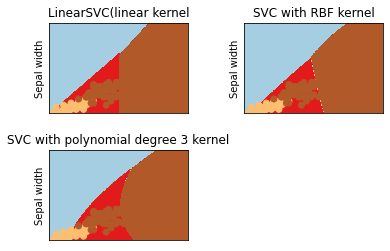

<Figure size 1152x864 with 0 Axes>

In [17]:
# the title of the graph
titles = ['LinearSVC(linear kernel',
                'SVC with RBF kernel',
                'SVC with polynomial degree 3 kernel']
# peviously we defined the classifiers below:
# lin_svc = svm.SVC(kernel='linear').fit(X_train, y_train)
# rbf_svc = svm.SVC(kernel='rbf').fit(X_train, y_train)
# poly_svc = svm.SVC(kernel='poly', degree=3).fit(X_train, y_train)
# now we need them to be plot on the graph, which can show the contour.

for i, clf in enumerate((lin_svc, rbf_svc,poly_svc)):
        # to plot the edge of different classes
        #  to create a 2*2 grid , and set the i image as current image
        plt.subplot(2,2,i+1)
        #set the margin between different subplot
        plt.subplots_adjust(wspace=0.4,hspace=0.4)

        #svm input :xx and yyout put an array

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        #feel this body

        #  plot the result
        Z = Z.reshape(xx.shape) #!!!!  (220, 280 why?????)
        plt.contourf(xx,yy,Z, cmap=plt.cm.Paired)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

plt.figure(figsize=(16,12))

In [18]:
pd.DataFrame(X[:, 0])

,0
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4
...,...
145,5.2
146,5.0
147,5.2
148,5.4
